# Лабораторная работа 4 В-11

In [3997]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Часть 1

In [3998]:
df = pd.read_excel("LAB_4_DATA_2024.xlsx")
df

,СТАЖ РАБОТЫ (лет),"ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час)
0,22.384615,12,0,53.410000
1,8.903846,12,0,8.000000
2,13.250000,15,0,24.000000
3,18.250000,13,0,29.500000
4,13.769231,18,0,32.049999
...,...,...,...,...
535,7.307693,12,1,9.500000
536,19.288462,14,1,17.299999
537,21.230770,12,1,27.520000
538,18.076923,13,1,3.880000


In [3999]:
shuffled_df = df.sample(frac=1, random_state=42)
shuffled_df

,СТАЖ РАБОТЫ (лет),"ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час)
229,20.173077,12,0,15.000000
73,17.961538,19,0,47.000000
521,12.269231,16,1,15.000000
86,20.038462,12,0,20.000000
469,20.538462,12,1,24.389999
...,...,...,...,...
71,18.846153,12,0,8.770000
106,21.423077,9,0,6.480000
270,13.557693,16,1,17.620001
435,18.403847,13,1,13.790000


In [4000]:
z = shuffled_df.iloc[:, 2].values[:520].reshape(-1, 1)
y = shuffled_df.iloc[:, 3].values[:520]
print(z)
print(y)

[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]


# 1.1 Зависимость зарплаты от пола работника 

In [4001]:
model = LinearRegression()
model.fit(z, y)

LinearRegression()

In [4002]:
b_0_hat=model.intercept_
print('intercept:', b_0_hat) 
b_1_hat=model.coef_
print('slope:', b_1_hat) 
print('coefficient of determination:', model.score(z, y))

intercept: 23.187164704918782
slope: [-6.88685578]
coefficient of determination: 0.056930818116285975


In [4003]:
y_predict = model.predict([[0]])
print(f"predicted response:\n{y_predict}")

predicted response:
[23.1871647]


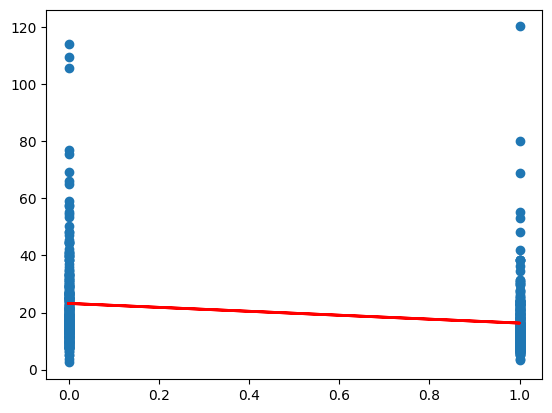

In [4004]:
plt.scatter(z,y)
plt.plot(z, model.predict(z), color='red', linewidth=2)

In [4005]:
from scipy.stats import f

n = len(y)
p = z.shape[1]  

y_pred = model.predict(z)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)   
TSS = np.sum((y - y_mean)**2)   

RSS = TSS - ESS
print(f'RSS: {RSS}')
print(f'ESS: {ESS}')
print(f'TSS: {TSS}')

R_2 = 1 - ESS/TSS
print(f"R^2: {R_2}")

RSS: 6165.650526194775
ESS: 102135.10344507114
TSS: 108300.75397126592
R^2: 0.056930818116285975


# 1.2 

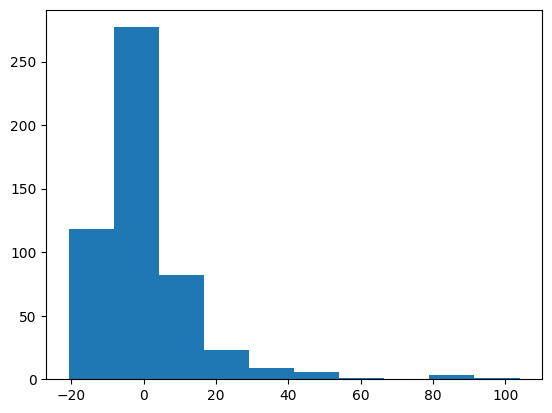

ShapiroResult(statistic=np.float64(0.7413285769286975), pvalue=np.float64(1.1147765168530954e-27))

In [4006]:
errors = y - y_pred
plt.hist(errors)
plt.show()
sp.stats.shapiro(errors)

In [4007]:
from scipy.stats import f
n = 520 
alpha = 0.075
m = 1
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")
print("H0: R^2 - незначим \nH1: R^2 - значим")
if F > F_cr:
    print(f"Отвергаем H0. Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Принимаем H0. Коээфициент R2 не значим на уровне alpha = {alpha}")


F - наблюдаемое значение: 31.270414038269823
F_cr - критическое значение: 3.1828517254128523
H0: R^2 - незначим 
H1: R^2 - значим
Отвергаем H0. Коээфициент R2 значим на уровне alpha = 0.075


In [4008]:
import statsmodels.api as sm
X_new = sm.add_constant(z)
model_1 = sm.OLS(y, X_new).fit()
print(model_1.summary(alpha = 0.075))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     31.27
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           3.64e-08
Time:                        21:54:20   Log-Likelihood:                -2110.7
No. Observations:                 520   AIC:                             4225.
Df Residuals:                     518   BIC:                             4234.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     [0.0375     0.9625]
------------------------------------------------------------------------------
const         23.1872      0.869     26.678      0.0

# 3 Зарплата от стажа и времени, затраченного на образование

In [4009]:
z_expirience = shuffled_df.iloc[:, 0].values[:520]
z_education = shuffled_df.iloc[:, 1].values[:520]
y = shuffled_df.iloc[:, 3].values[:520]
X = np.column_stack((z_expirience, z_education))
print(X.shape)
print(y.shape)

(520, 2)
(520,)


In [4010]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [4011]:
b_0_hat=model.intercept_
print('intercept:', b_0_hat) 
b_1_hat=model.coef_
print(f'b_1 (Опыт работы):', b_1_hat[0]) 
print(f'b_2 (Время потраченное на образование):', b_1_hat[1]) 
print('coefficient of determination:', model.score(X, y))

intercept: -25.42326709815232
b_1 (Опыт работы): 0.555079676952301
b_2 (Время потраченное на образование): 2.6171090317704695
coefficient of determination: 0.19236968936827958


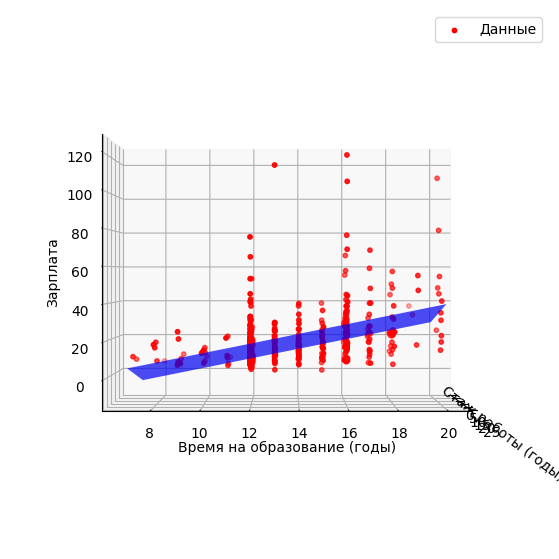

In [4012]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


x1_range = np.linspace(min(z_expirience), max(z_expirience), 100)
x2_range = np.linspace(min(z_education), max(z_education), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)  


X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))


y_grid = model.predict(X_grid)

y_grid = y_grid.reshape(x1_grid.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(z_expirience, z_education, y, color='r', label='Данные', s=10)

ax.plot_surface(x1_grid, x2_grid, y_grid, color='b', alpha=0.7, rstride=100, cstride=100)


ax.set_xlabel('Стаж работы (годы)')
ax.set_ylabel('Время на образование (годы)')
ax.set_zlabel('Зарплата')

ax.legend()

ax.view_init(elev=0, azim=0)  
plt.show()


# 4-5 Увеличиваем стаж работы на 1 год, увеличиваем время на образование на 1 год

In [4013]:
b_1_hat=model.coef_
print('Увеличение зарплаты если стаж увеличить на год:', b_1_hat[0]) 
print('Увеличение зарплаты если время обучения увеличить на год:', b_1_hat[1]) 

Увеличение зарплаты если стаж увеличить на год: 0.555079676952301
Увеличение зарплаты если время обучения увеличить на год: 2.6171090317704695


In [4014]:
n = len(y)
p = z.shape[1]  

y_pred = model.predict(X)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)   
TSS = np.sum((y - y_mean)**2)   

RSS = TSS - ESS
print(f"RSS: {RSS}")
print(f"ESS: {ESS}")
print(f"TSS: {TSS}")

R_2 = 1 - ESS/TSS
print(f"R2: {R_2}")

RSS: 20833.78239980289
ESS: 87466.97157146303
TSS: 108300.75397126592
R2: 0.19236968936827958


# 6 

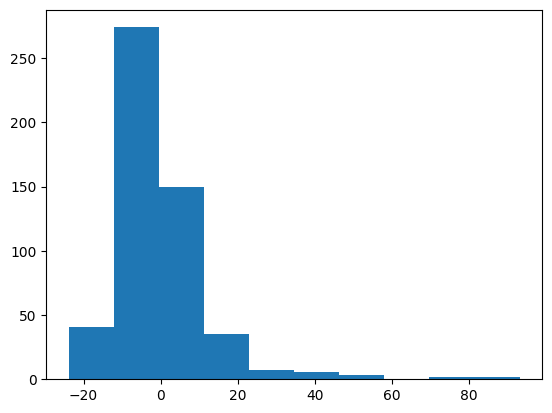

ShapiroResult(statistic=np.float64(0.7603759746488803), pvalue=np.float64(8.207962480157801e-27))

In [4015]:
errors = y - y_pred
plt.hist(errors)
plt.show()
sp.stats.shapiro(errors)

In [4016]:
from scipy.stats import f
n = 520 
alpha = 0.075
m = 2
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")
print("H0: R^2 - незначим \nH1: R^2 - значим")
if F > F_cr:
    print(f"Отвергаем H0. Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Принимаем H0. Коээфициент R2 не значим на уровне alpha = {alpha}")

F - наблюдаемое значение: 61.572187233542344
F_cr - критическое значение: 2.6032883467971373
H0: R^2 - незначим 
H1: R^2 - значим
Отвергаем H0. Коээфициент R2 значим на уровне alpha = 0.075


In [4017]:
X_new = sm.add_constant(X)
model_2 = sm.OLS(y, X_new).fit()
print(model_2.summary(alpha = 0.075))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     61.57
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           1.03e-24
Time:                        21:54:20   Log-Likelihood:                -2070.4
No. Observations:                 520   AIC:                             4147.
Df Residuals:                     517   BIC:                             4160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     [0.0375     0.9625]
------------------------------------------------------------------------------
const        -25.4233      4.375     -5.811      0.0

# 7 

In [4018]:
errors = y - y_pred
n = len(y) 
Se2 = np.sum(errors**2)/(n-2-1)
Se = np.sqrt(Se2)
print(Se)

13.006989013385043


In [4019]:
n = len(y)
X_matr = np.column_stack((np.ones((n, 1)), z_expirience, z_education))
X_matr

array([[ 1.        , 20.17307663, 12.        ],
       [ 1.        , 17.96153831, 19.        ],
       [ 1.        , 12.26923084, 16.        ],
       ...,
       [ 1.        ,  9.25      , 18.        ],
       [ 1.        , 21.40384674, 12.        ],
       [ 1.        , 19.73077011, 16.        ]])

In [4020]:
from scipy import linalg

X_matr_T=X_matr.transpose()
Z=X_matr_T.dot(X_matr)
Z_inv =linalg.inv(Z)

In [4021]:
se_b_0_hat=Se*math.sqrt(Z_inv[0][0])
print(f"Стандартная ошибка коэффициента b_0_hat: {se_b_0_hat}")   
se_b_1_hat=Se*math.sqrt(Z_inv[1][1])
print(f"Стандартная ошибка коэффициента b_1_hat: {se_b_1_hat}")   
se_b_2_hat=Se*math.sqrt(Z_inv[2][2])
print(f"Стандартная ошибка коэффициента b_2_hat: {se_b_2_hat}")    

Стандартная ошибка коэффициента b_0_hat: 4.3753618323786805
Стандартная ошибка коэффициента b_1_hat: 0.13118085729568726
Стандартная ошибка коэффициента b_2_hat: 0.2392672264766887


In [4022]:
gamma = 0.925
n = len(y)
m = 2
b_0_hat=model.intercept_
b_1_hat=model.coef_[0]
b_2_hat=model.coef_[1]

t_cr = stats.t.ppf((1+gamma)/2, n-m-1)
print(f"Доверительный интервал для b_0_hat на уровне надежности: {gamma}: {b_0_hat - (t_cr*se_b_0_hat), b_0_hat + (t_cr*se_b_0_hat)}")
print(f"Доверительный интервал для b_1_hat на уровне надежности: {gamma}: {b_1_hat - (t_cr*se_b_1_hat), b_1_hat + (t_cr*se_b_1_hat)}")
print(f"Доверительный интервал для b_2_hat на уровне надежности: {gamma}: {b_2_hat - (t_cr*se_b_2_hat), b_2_hat + (t_cr*se_b_2_hat)}")

Доверительный интервал для b_0_hat на уровне надежности: 0.925: (np.float64(-33.229183064867804), np.float64(-17.617351131436834))
Доверительный интервал для b_1_hat на уровне надежности: 0.925: (np.float64(0.3210449187491978), np.float64(0.7891144351554041))
Доверительный интервал для b_2_hat на уровне надежности: 0.925: (np.float64(2.1902415097189887), np.float64(3.0439765538219503))


In [4023]:
from scipy import stats
b_1_hat=model.coef_[0]
b_2_hat=model.coef_[1]

alpha = 0.075
n = len(y)
m = 2

t_1 = b_1_hat/ se_b_1_hat
print(f'СВ t_1:  {t_1}')
t_2 = b_2_hat/ se_b_2_hat
print(f'СВ t_2:  {t_2}')

t_cr = stats.t.ppf(1-alpha/2, n - m - 1)
print(t_cr)

if -t_cr < t_1 < t_cr:
    print(f"Коэффициент b1_hat не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b1_hat значим на уровне значимости alpha: {alpha}")

if -t_cr < t_2 < t_cr:
    print(f"Коэффициент b2_hat не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b2_hat значим на уровне значимости alpha: {alpha}")

СВ t_1:  4.231407603177403
СВ t_2:  10.93801717146351
1.784061813802442
Коэффициент b1_hat значим на уровне значимости alpha: 0.075
Коэффициент b2_hat значим на уровне значимости alpha: 0.075


# Часть 2

In [4024]:
X = np.column_stack((z_expirience, z_education, z)) 
print(X)

[[20.17307663 12.          0.        ]
 [17.96153831 19.          0.        ]
 [12.26923084 16.          1.        ]
 ...
 [ 9.25       18.          0.        ]
 [21.40384674 12.          1.        ]
 [19.73077011 16.          0.        ]]


In [4025]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

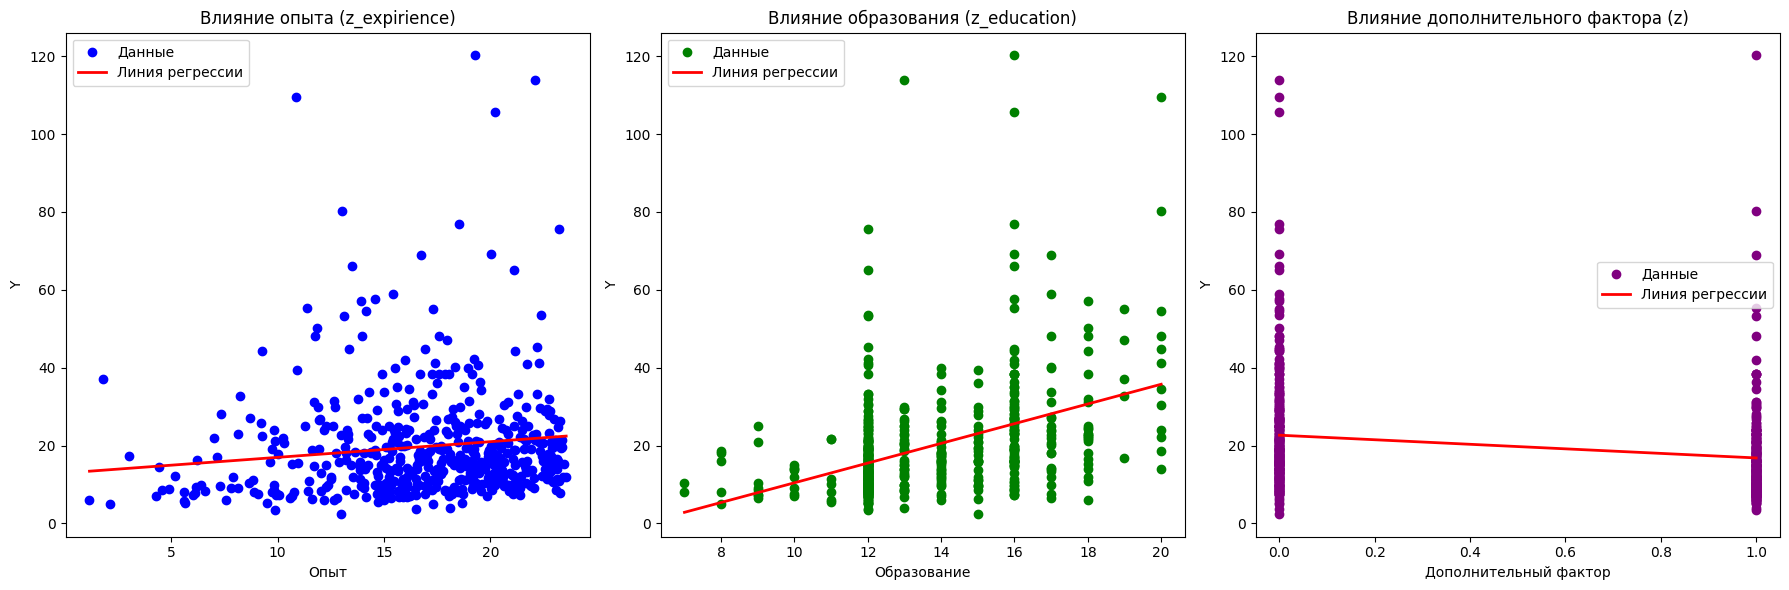

In [4026]:
z_expirience_range = np.linspace(z_expirience.min(), z_expirience.max(), 100).reshape(-1, 1)
z_education_fixed = np.mean(z_education) * np.ones_like(z_expirience_range)
z_fixed = np.mean(z) * np.ones_like(z_expirience_range)
X_expirience = np.column_stack((z_expirience_range, z_education_fixed, z_fixed))
y_expirience_pred = model.predict(X_expirience)

z_education_range = np.linspace(z_education.min(), z_education.max(), 100).reshape(-1, 1)
z_expirience_fixed = np.mean(z_expirience) * np.ones_like(z_education_range)
z_fixed = np.mean(z) * np.ones_like(z_education_range)
X_education = np.column_stack((z_expirience_fixed, z_education_range, z_fixed))
y_education_pred = model.predict(X_education)

z_range = np.linspace(z.min(), z.max(), 100).reshape(-1, 1)
z_expirience_fixed = np.mean(z_expirience) * np.ones_like(z_range)
z_education_fixed = np.mean(z_education) * np.ones_like(z_range)
X_z = np.column_stack((z_expirience_fixed, z_education_fixed, z_range))
y_z_pred = model.predict(X_z)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# График 1: Опыт (z_expirience)
axes[0].scatter(z_expirience, y, color='blue', label='Данные')
axes[0].plot(z_expirience_range, y_expirience_pred, color='red', linewidth=2, label='Линия регрессии')
axes[0].set_title('Влияние опыта (z_expirience)')
axes[0].set_xlabel('Опыт')
axes[0].set_ylabel('Y')
axes[0].legend()

# График 2: Образование (z_education)
axes[1].scatter(z_education, y, color='green', label='Данные')
axes[1].plot(z_education_range, y_education_pred, color='red', linewidth=2, label='Линия регрессии')
axes[1].set_title('Влияние образования (z_education)')
axes[1].set_xlabel('Образование')
axes[1].set_ylabel('Y')
axes[1].legend()

# График 3: Дополнительный фактор (z)
axes[2].scatter(z, y, color='purple', label='Данные')
axes[2].plot(z_range, y_z_pred, color='red', linewidth=2, label='Линия регрессии')
axes[2].set_title('Влияние дополнительного фактора (z)')
axes[2].set_xlabel('Дополнительный фактор')
axes[2].set_ylabel('Y')
axes[2].legend()

# Убираем лишние отступы и показываем графики
plt.tight_layout()
plt.show()


In [4027]:
import statsmodels.api as sm

X_new = sm.add_constant(X)
model_3 = sm.OLS(y, X_new).fit()
print(model_3.summary(alpha = 0.075))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     51.72
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           3.06e-29
Time:                        21:54:20   Log-Likelihood:                -2057.6
No. Observations:                 520   AIC:                             4123.
Df Residuals:                     516   BIC:                             4140.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     [0.0375     0.9625]
------------------------------------------------------------------------------
const        -18.7458      4.469     -4.195      0.0

# 1

In [4028]:
b_0_hat = model.intercept_
print('intercept:', b_0_hat) 
b_1_hat, b_2_hat,b_3_hat = model.coef_
print(f'b_1 (Опыт работы):', b_1_hat) 
print(f'b_2 (Время потраченное на образование):', b_2_hat) 
print(f'b_3 (Пол рабочего):', b_3_hat) 
print(f'R^2: {model.score(X, y)}')

intercept: -18.745816356231987
b_1 (Опыт работы): 0.40262426354552644
b_2 (Время потраченное на образование): 2.529967648773603
b_3 (Пол рабочего): -5.840180624513491
R^2: 0.2311813507450593


# 2

In [4029]:
n = len(y)
p = z.shape[1]  

y_pred = model.predict(X)
y_mean = np.mean(y)

ESS = np.sum((y - y_pred)**2)   
TSS = np.sum((y - y_mean)**2)   

RSS = TSS - ESS
print(f"RSS: {RSS}")
print(f"ESS: {ESS}")
print(f"TSS: {TSS}")

R_2 = 1 - ESS/TSS
print(f"R2: {R_2}")

RSS: 25037.114589785604
ESS: 83263.63938148032
TSS: 108300.75397126592
R2: 0.2311813507450593


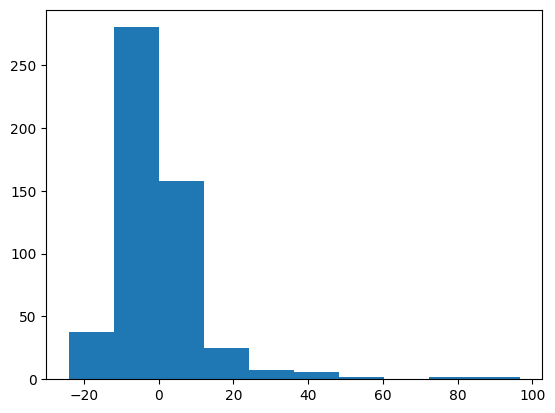

ShapiroResult(statistic=np.float64(0.7549015841789168), pvalue=np.float64(4.567669487940023e-27))

In [4030]:
errors = y - y_pred
plt.hist(errors)
plt.show()
sp.stats.shapiro(errors)

In [4031]:
from scipy.stats import f
n = 520 
alpha = 0.075
m = 3
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_cr = f.ppf(1-alpha, m, n-m-1)
print(f"F_cr - критическое значение: {F_cr}")

if F > F_cr:
    print(f"Коээфициент R2 значим на уровне alpha = {alpha}")
else:
    print(f"Коээфициент R2 не значим на уровне alpha = {alpha}")

F - наблюдаемое значение: 51.71985924988236
F_cr - критическое значение: 2.314761859653053
Коээфициент R2 значим на уровне alpha = 0.075


# 3. 6-7

In [4032]:
errors = y - y_pred
n = len(y) 
Se2 = np.sum(errors**2)/(n-3-1)
Se = np.sqrt(Se2)
print(Se)

12.702898968824838


In [4033]:
n = len(y)
X_matr = np.column_stack((np.ones((n, 1)), z_expirience, z_education, z))
X_matr_trans = X_matr.transpose()
Z = X_matr_trans.dot(X_matr)
Z_inv = linalg.inv(Z)

In [4034]:
se_b_0_hat=Se*math.sqrt(Z_inv[0][0])
print(f"Стандартная ошибка коэффициента b_0_hat: {se_b_0_hat}")   
se_b_1_hat=Se*math.sqrt(Z_inv[1][1])
print(f"Стандартная ошибка коэффициента b_1_hat: {se_b_1_hat}")   
se_b_2_hat=Se*math.sqrt(Z_inv[2][2])
print(f"Стандартная ошибка коэффициента b_2_hat: {se_b_2_hat}")    
se_b_3_hat=Se*math.sqrt(Z_inv[3][3])
print(f"Стандартная ошибка коэффициента b_3_hat: {se_b_3_hat}")    


Стандартная ошибка коэффициента b_0_hat: 4.468876017473061
Стандартная ошибка коэффициента b_1_hat: 0.13155023994476298
Стандартная ошибка коэффициента b_2_hat: 0.23429633997619942
Стандартная ошибка коэффициента b_3_hat: 1.1442798918653463


In [4035]:
t_1 = b_1_hat/ se_b_1_hat
print(f'СВ t_1:  {t_1}')
t_2 = b_2_hat/ se_b_2_hat
print(f'СВ t_2:  {t_2}')
t_3 = b_3_hat/ se_b_3_hat
print(f'СВ t_3:  {t_3}')
t_cr = stats.t.ppf((1+gamma)/2, n - m - 1)
print(t_cr)
if -t_cr < t_1 < t_cr:
    print(f"Коэффициент b1_hat (опыт работы) не значим на уровне надежности gamma: {gamma}")
else:
    print(f"Коэффициент b1_hat (опыт работы) значим на уровне надежности gamma: {gamma}")

if -t_cr < t_2 < t_cr:
    print(f"Коэффициент b2_hat (время потраченное на образование) не значим на уровне надежности gamma: {gamma}")
else:
    print(f"Коэффициент b2_hat (время потраченное на образование) значим на уровне надежности gamma: {gamma}")

if -t_cr < t_3 < t_cr:
    print(f"Коэффициент b3_hat (пол рабочего) не значим на уровне надежности gamma: {gamma}")
else:
    print(f"Коэффициент b3_hat (пол рабочего) значим на уровне надежности gamma: {gamma}")

СВ t_1:  3.060612156348674
СВ t_2:  10.798152668669964
СВ t_3:  -5.103804293015346
1.7840687996978528
Коэффициент b1_hat (опыт работы) значим на уровне надежности gamma: 0.925
Коэффициент b2_hat (время потраченное на образование) значим на уровне надежности gamma: 0.925
Коэффициент b3_hat (пол рабочего) значим на уровне надежности gamma: 0.925


# 8.

In [4036]:
b, c, a = 4, 12, 0
new_X = np.array([1, b, c, a])  
prediction = model_3.get_prediction(new_X)
pred_summary = prediction.summary_frame(alpha=(1-gamma))  
pred_summary


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,13.224292,2.109301,9.461154,16.987431,-9.748861,36.197446


In [4037]:
n = 520 
m = 3
b, c, a = 4, 12, 0
new_X = np.array([1, b, c, a])  
new_X_T = np.array([1, b, c, a]).transpose()
new_Z = new_X.dot(Z_inv)
res_matr = new_Z.dot(new_X)

t_cr = stats.t.ppf((1+gamma)/2, n - m - 1)
y_hat = b_0_hat+b_1_hat*new_X[1]+b_2_hat*new_X[2]+b_3_hat*new_X[3]
print(y_hat)
co = Se*np.sqrt(1+res_matr)
print(f'Интервальная оценка для индивидуального (прогнозного) значения y_hat: {y_hat-co*t_cr} - {y_hat+co*t_cr}')

13.224292483233352
Интервальная оценка для индивидуального (прогнозного) значения y_hat: -9.748861073123205 - 36.197446039589906


# 9

In [4038]:
b_1_hat, b_2_hat,b_3_hat = model.coef_
print(b_1_hat*2)

0.8052485270910529


# 10

In [4039]:
t_3 = b_3_hat/ se_b_3_hat
print(f'СВ t_3:  {t_3}')
t_cr = stats.t.ppf((1+gamma)/2, n - m - 1)
print(t_cr)

if -t_cr < t_3 < t_cr:
    print(f"Коэффициент b3_hat (пол рабочего) не значим на уровне надежности gamma: {gamma}")
else:
    print(f"Коэффициент b3_hat (пол рабочего) значим на уровне надежности gamma: {gamma}")

СВ t_3:  -5.103804293015346
1.7840687996978528
Коэффициент b3_hat (пол рабочего) значим на уровне надежности gamma: 0.925
